<a href="https://colab.research.google.com/github/veerendrapv/ML-SD/blob/main/SeasonalAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import datetime as dt
import plotly.express as ps
from adtk.visualization import plot
from adtk.detector import SeasonalAD

In [ ]:
#create a dataframe
timerange = pd.date_range(start='1/1/2023',end='6/30/2023',freq='H')
df = pd.DataFrame(timerange,columns=['time'])
df['data']= np.random.randint(100,200,size=len(timerange))

In [ ]:
#Update the dataframe to have data at a specific time to get a pattern
df['time'] = pd.to_datetime(df['time'])
for index,row in df.iterrows():
  if(row['time']>=pd.Timestamp(row['time'].year,row['time'].month,row['time'].day,9,0,0) and
     row['time']<=pd.Timestamp(row['time'].year,row['time'].month,row['time'].day,13,0,0)):
     df.at[index,'data']= np.random.randint(15000,20000)


In [ ]:
#insert anomalies on a specific day
for index,row in df.iterrows():
  if(row['time']>=pd.Timestamp(2023,2,14,9,0,0) and
     row['time']<=pd.Timestamp(2023,2,14,13,0,0)):
     df.at[index,'data']= np.random.randint(15,20)

In [ ]:
#when you plot the data you can see a gap for one day
fig = ps.line(df.reset_index(),x=df['time'],y=df['data'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

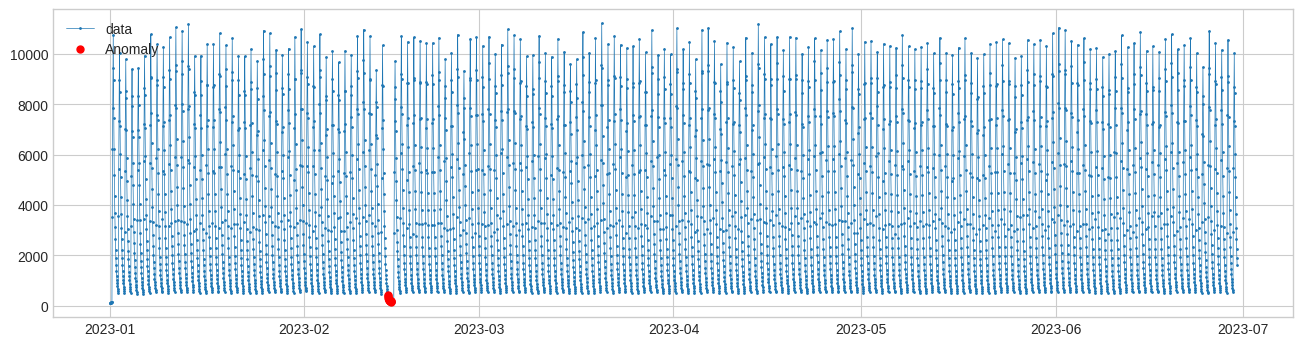

In [ ]:
#Now create the model and detect for any anomalies
df2 = df.copy(deep=True)
df2['data'] = df['data'].ewm(halflife=4).mean()
df2.set_index('time',inplace=True)
ad = SeasonalAD(c=10.0, side="negative")
df2['anomalies'] = ad.fit_detect(df2)
output = df2.loc[df2['anomalies']==1]
#this plot is on smoothen data
plot(df2['data'], anomaly=df2['anomalies'], anomaly_color='red', anomaly_tag="marker", anomaly_markersize=5);